In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# After following the installation (or building from source) instructions,
# you should be able to import jaxquantum without having to add it to
# your path explicitly. 

import jaxquantum as jqt
from jax import device_put, jit
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
omega_q = 5.0 #GHz
Omega = .1
H0 = omega_q/2.0*jqt.sigmaz()
H1 = Omega*jqt.sigmax()
g_state = jqt.ket2dm(jqt.basis(2,0)) + 0.0j
tf = jnp.pi/Omega
ts = jnp.linspace(0,tf,101)

c_ops = jnp.array([])

In [4]:
@jit
def Ht(t):
    fac = jnp.cos((omega_q+0j)*t)
    return H0 + H1*fac

In [5]:
%timeit results = jqt.mesolve(g_state, ts, c_ops=c_ops, Ht=Ht, use_density_matrix=False) 

2.05 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
states = jqt.mesolve(g_state, ts, c_ops=c_ops, Ht=Ht, use_density_matrix=False) 

In [7]:
szt = jnp.real(jqt.calc_expect(jqt.sigmaz(), states))

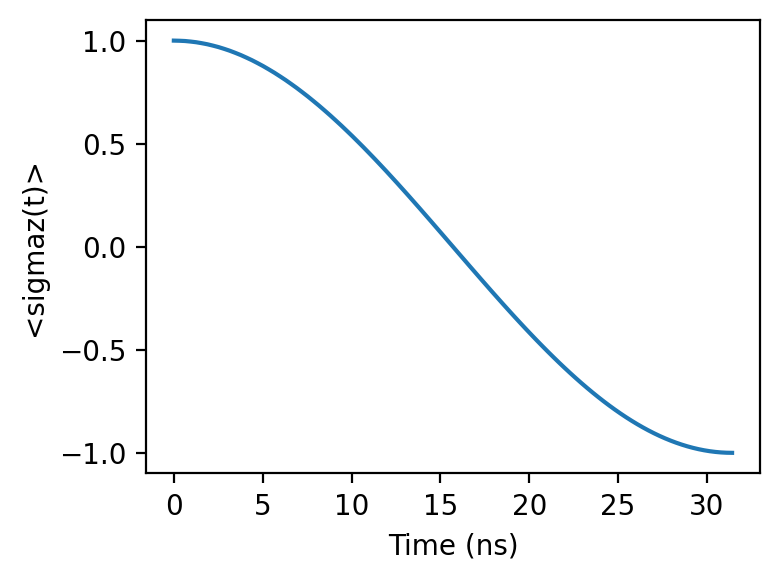

In [8]:
fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(ts, szt)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<sigmaz(t)>")
fig.tight_layout()